In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
states = gpd.read_file('../data/single_parent/kaggle/us-states.json')
print(states.crs)
states.head(3)

epsg:4326


,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."


In [3]:
type(states)

geopandas.geodataframe.GeoDataFrame

In [4]:
states1 = gpd.read_file('../data/single_parent/opendatasoft/us_state_boundaries.geojson')
print(states.crs)
pd.set_option('display.max_columns', 50)
states1

epsg:4326


,gid,arealand,division,intptlat,name,objectid,areawater,intptlon,oid,funcstat,centlon,stusab,state,statens,centlat,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry
0,16,278176477,0,18.217648,Puerto Rico,50,628200285,-66.410799,303146031,A,-66.414761,PR,72,01779808,18.216472,Puerto Rico,G4000,9,00,72,"{'lon': -66.414643, 'lat': 18.215733}","MULTIPOLYGON (((-67.20794 18.44228, -67.21713 ..."
1,23,472276664,0,14.936784,Commonwealth of the Northern Mariana Islands,36,349301029,145.601021,-1625647860,A,145.596871,MP,69,01779809,16.797438,Commonwealth of the Northern Mariana Islands,G4000,9,00,69,"{'lon': 145.59581, 'lat': 16.816477}","MULTIPOLYGON (((145.57260 15.12502, 145.64831 ..."
2,31,1627312771,7,34.895526,Arkansas,44,-1334552525,-92.444626,266078934,A,-92.442699,AR,05,00068085,34.894021,Arkansas,G4000,3,00,05,"{'lon': -92.439356, 'lat': 34.899696}","POLYGON ((-94.55218 36.10224, -94.58620 36.299..."
3,35,2136109036,5,38.647285,West Virginia,1,489848791,-80.618327,-1929409300,A,-80.623456,WV,54,01779805,38.641186,West Virginia,G4000,3,00,54,"{'lon': -80.613701, 'lat': 38.642578}","POLYGON ((-81.74725 39.09538, -81.74385 39.102..."
4,40,-1616974352,1,41.597419,Rhode Island,6,1323457457,-71.527272,-1861167639,A,-71.524721,RI,44,01219835,41.594025,Rhode Island,G4000,1,00,44,"{'lon': -71.524812, 'lat': 41.594693}","MULTIPOLYGON (((-71.78970 41.72456, -71.79788 ..."
5,54,312831514,9,47.407324,Washington,20,-324557627,-120.575800,-1859906639,A,-120.595574,WA,53,01779804,47.414899,Washington,G4000,4,00,53,"{'lon': -120.592673, 'lat': 47.411657}","POLYGON ((-123.24792 48.28456, -123.11514 48.4..."
6,55,235758874,7,30.863437,Louisiana,21,-2023496089,-91.798717,273332861,A,-91.798227,LA,22,01629543,30.902586,Louisiana,G4000,3,00,22,"{'lon': -91.814298, 'lat': 30.909179}","POLYGON ((-92.06911 33.00816, -91.50012 33.006..."
7,38,73043361,4,46.315815,Minnesota,4,1750136443,-94.199663,-1899485909,A,-94.198223,MN,27,00662849,46.316485,Minnesota,G4000,2,00,27,"{'lon': -94.198156, 'lat': 46.349139}","POLYGON ((-96.78438 46.63050, -96.78209 46.631..."
8,42,1712577727,1,43.672691,New Hampshire,8,1028674404,-71.584315,-1858446377,A,-71.573849,NH,33,01779794,43.674033,New Hampshire,G4000,1,00,33,"{'lon': -71.571235, 'lat': 43.680245}","POLYGON ((-72.32990 43.60021, -72.32813 43.601..."
9,12,-812563424,6,37.533684,Kentucky,34,-1906562745,-85.292980,-1985301492,A,-85.301836,KY,21,01779786,37.535193,Kentucky,G4000,3,00,21,"{'lon': -85.29054, 'lat': 37.526603}","MULTIPOLYGON (((-88.06133 37.50533, -88.06297 ..."


In [5]:
states1a = states1[['name', 'intptlon', 'centlon', 'stusab', 'centlat', 'region', 'geoid', 'geo_point_2d', 'geometry']]
states1a

,name,intptlon,centlon,stusab,centlat,region,geoid,geo_point_2d,geometry
0,Puerto Rico,-66.410799,-66.414761,PR,18.216472,9,72,"{'lon': -66.414643, 'lat': 18.215733}","MULTIPOLYGON (((-67.20794 18.44228, -67.21713 ..."
1,Commonwealth of the Northern Mariana Islands,145.601021,145.596871,MP,16.797438,9,69,"{'lon': 145.59581, 'lat': 16.816477}","MULTIPOLYGON (((145.57260 15.12502, 145.64831 ..."
2,Arkansas,-92.444626,-92.442699,AR,34.894021,3,05,"{'lon': -92.439356, 'lat': 34.899696}","POLYGON ((-94.55218 36.10224, -94.58620 36.299..."
3,West Virginia,-80.618327,-80.623456,WV,38.641186,3,54,"{'lon': -80.613701, 'lat': 38.642578}","POLYGON ((-81.74725 39.09538, -81.74385 39.102..."
4,Rhode Island,-71.527272,-71.524721,RI,41.594025,1,44,"{'lon': -71.524812, 'lat': 41.594693}","MULTIPOLYGON (((-71.78970 41.72456, -71.79788 ..."
5,Washington,-120.575800,-120.595574,WA,47.414899,4,53,"{'lon': -120.592673, 'lat': 47.411657}","POLYGON ((-123.24792 48.28456, -123.11514 48.4..."
6,Louisiana,-91.798717,-91.798227,LA,30.902586,3,22,"{'lon': -91.814298, 'lat': 30.909179}","POLYGON ((-92.06911 33.00816, -91.50012 33.006..."
7,Minnesota,-94.199663,-94.198223,MN,46.316485,2,27,"{'lon': -94.198156, 'lat': 46.349139}","POLYGON ((-96.78438 46.63050, -96.78209 46.631..."
8,New Hampshire,-71.584315,-71.573849,NH,43.674033,1,33,"{'lon': -71.571235, 'lat': 43.680245}","POLYGON ((-72.32990 43.60021, -72.32813 43.601..."
9,Kentucky,-85.292980,-85.301836,KY,37.535193,3,21,"{'lon': -85.29054, 'lat': 37.526603}","MULTIPOLYGON (((-88.06133 37.50533, -88.06297 ..."


In [6]:
type(states1)

geopandas.geodataframe.GeoDataFrame

In [7]:
states1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gid           56 non-null     int64   
 1   arealand      56 non-null     object  
 2   division      56 non-null     int64   
 3   intptlat      56 non-null     float64 
 4   name          56 non-null     object  
 5   objectid      56 non-null     int64   
 6   areawater     56 non-null     object  
 7   intptlon      56 non-null     float64 
 8   oid           56 non-null     object  
 9   funcstat      56 non-null     object  
 10  centlon       56 non-null     float64 
 11  stusab        56 non-null     object  
 12  state         56 non-null     object  
 13  statens       56 non-null     object  
 14  centlat       56 non-null     float64 
 15  basename      56 non-null     object  
 16  mtfcc         56 non-null     object  
 17  region        56 non-null     int64   
 18  lsad

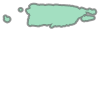

In [8]:
states1.loc[0, 'geometry']

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


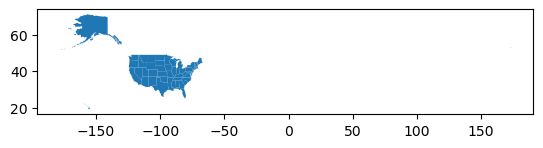

In [9]:
states.plot();

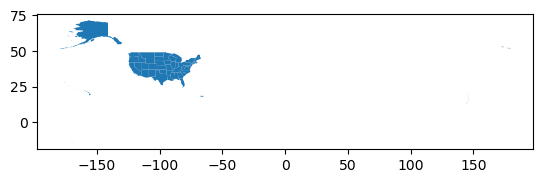

In [10]:
states1.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by routes
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by `matplotib`

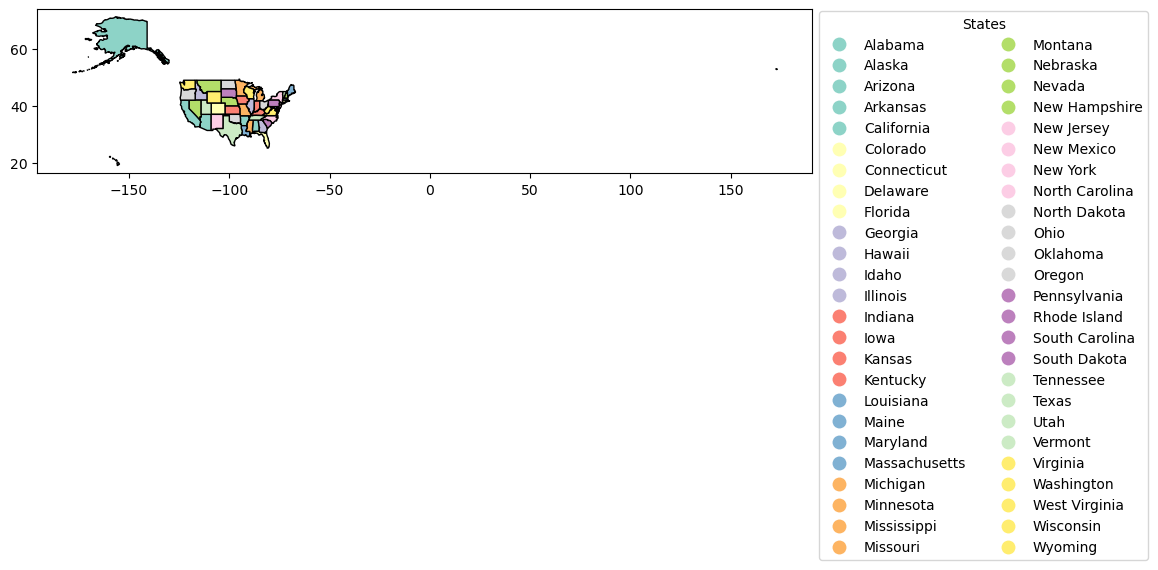

In [11]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'States', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

states.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [12]:
single_parent = pd.read_csv('../data/single_parent/diversitydatakids/states_single_parent_households/single_parent_households_by_state.csv')
print(single_parent.shape)
print(states.crs)
single_parent.head(3)

(459, 31)
epsg:4326


,geoid,name,year,total_est,total_se,aian_se,aian_est,api_se,api_est,asian_se,asian_est,black_se,black_est,hisp_se,hisp_est,nhisp_se,nhisp_est,nhopi_se,nhopi_est,nhwhite_se,nhwhite_est,nnhwhite_se,nnhwhite_est,other_se,other_est,othermore_se,othermore_est,twomore_se,twomore_est,white_se,white_est
0,04000US01,Alabama,2005-2009,341684,2331.525698,184.058056,1809,212.805902,2032,207.756931,1915,1497.212150,164472,382.698791,8560,2362.725216,333124,46.080472,117,1717.638594,161988,2895.909947,179696,201.319551,2390,289.018596,5828,207.369687,3438,1755.236587,167543
1,04000US01,Alabama,2006-2010,344180,2301.194520,188.076897,2052,195.818294,2126,193.386653,2064,1542.533974,161773,476.879844,10895,2350.087361,333285,30.763723,62,1644.141317,164477,2828.196755,179703,284.854166,3345,362.159550,6871,223.646247,3526,1658.480854,171358
2,04000US01,Alabama,2007-2011,350830,2264.563805,185.270761,2163,169.685455,2159,163.806940,2062,1306.633054,164844,409.957740,11162,2301.372324,339668,44.276859,97,1783.792702,167618,2882.735789,183212,263.120076,3578,352.600876,7049,234.723674,3471,1824.288180,174615


In [13]:
single_parent = single_parent.rename({'geoid': 'census_geoid'}, axis=1)
single_parent.head(2)

,census_geoid,name,year,total_est,total_se,aian_se,aian_est,api_se,api_est,asian_se,asian_est,black_se,black_est,hisp_se,hisp_est,nhisp_se,nhisp_est,nhopi_se,nhopi_est,nhwhite_se,nhwhite_est,nnhwhite_se,nnhwhite_est,other_se,other_est,othermore_se,othermore_est,twomore_se,twomore_est,white_se,white_est
0,04000US01,Alabama,2005-2009,341684,2331.525698,184.058056,1809,212.805902,2032,207.756931,1915,1497.212150,164472,382.698791,8560,2362.725216,333124,46.080472,117,1717.638594,161988,2895.909947,179696,201.319551,2390,289.018596,5828,207.369687,3438,1755.236587,167543
1,04000US01,Alabama,2006-2010,344180,2301.194520,188.076897,2052,195.818294,2126,193.386653,2064,1542.533974,161773,476.879844,10895,2350.087361,333285,30.763723,62,1644.141317,164477,2828.196755,179703,284.854166,3345,362.159550,6871,223.646247,3526,1658.480854,171358


In [14]:
single_parent_geometry = states1a.merge(single_parent, on = 'name', how = 'outer')
single_parent_geometry

,name,intptlon,centlon,stusab,centlat,region,geoid,geo_point_2d,geometry,census_geoid,year,total_est,total_se,aian_se,aian_est,api_se,api_est,asian_se,asian_est,black_se,black_est,hisp_se,hisp_est,nhisp_se,nhisp_est,nhopi_se,nhopi_est,nhwhite_se,nhwhite_est,nnhwhite_se,nnhwhite_est,other_se,other_est,othermore_se,othermore_est,twomore_se,twomore_est,white_se,white_est
0,Puerto Rico,-66.410799,-66.414761,PR,18.216472,9,72,"{'lon': -66.414643, 'lat': 18.215733}","MULTIPOLYGON (((-67.20794 18.44228, -67.21713 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Commonwealth of the Northern Mariana Islands,145.601021,145.596871,MP,16.797438,9,69,"{'lon': 145.59581, 'lat': 16.816477}","MULTIPOLYGON (((145.57260 15.12502, 145.64831 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arkansas,-92.444626,-92.442699,AR,34.894021,3,05,"{'lon': -92.439356, 'lat': 34.899696}","POLYGON ((-94.55218 36.10224, -94.58620 36.299...",04000US05,2005-2009,191287.0,1952.762429,118.878793,1106.0,140.563623,1412.0,131.937302,1238.0,1082.286259,62606.0,370.801233,9472.0,1987.655569,181815.0,48.483817,174.0,1301.173478,114223.0,2346.557804,77064.0,297.015076,4536.0,372.697428,7545.0,225.134220,3009.0,1334.954948,118618.0
3,Arkansas,-92.444626,-92.442699,AR,34.894021,3,05,"{'lon': -92.439356, 'lat': 34.899696}","POLYGON ((-94.55218 36.10224, -94.58620 36.299...",04000US05,2006-2010,195766.0,1712.999138,106.909681,988.0,168.832874,1855.0,156.079541,1544.0,840.720451,61092.0,453.856286,11157.0,1772.103715,184609.0,64.371704,311.0,1432.430552,118027.0,2232.985296,77739.0,329.777569,4872.0,412.781181,8017.0,248.264090,3145.0,1437.126976,123814.0
4,Arkansas,-92.444626,-92.442699,AR,34.894021,3,05,"{'lon': -92.439356, 'lat': 34.899696}","POLYGON ((-94.55218 36.10224, -94.58620 36.299...",04000US05,2007-2011,197814.0,1787.859361,115.541505,847.0,180.077782,1849.0,163.367568,1467.0,971.583956,61923.0,484.562547,11569.0,1852.361184,186245.0,75.756488,382.0,1399.030423,118933.0,2270.182199,78881.0,374.327938,4762.0,433.207810,8042.0,218.054127,3280.0,1446.692121,125153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Florida,-82.409148,-82.424451,FL,28.460406,3,12,"{'lon': -82.466465, 'lat': 28.477305}","MULTIPOLYGON (((-86.38865 30.99418, -85.99861 ...",04000US12,2009-2013,1264765.0,5179.738249,321.751153,4446.0,569.645749,20868.0,556.410370,20152.0,2499.068300,345853.0,2747.852167,326445.0,5863.478478,938320.0,122.081037,716.0,2990.164457,564951.0,5980.867145,699814.0,991.744484,36875.0,1203.362335,59852.0,681.559819,22977.0,4194.171042,833746.0
460,Florida,-82.409148,-82.424451,FL,28.460406,3,12,"{'lon': -82.466465, 'lat': 28.477305}","MULTIPOLYGON (((-86.38865 30.99418, -85.99861 ...",04000US12,2010-2014,1286027.0,3860.674570,297.796650,4498.0,637.719554,22063.0,626.402136,21271.0,2110.418559,346770.0,2494.657201,338576.0,4596.533769,947451.0,119.610174,792.0,3119.995370,570748.0,4963.786785,715279.0,966.956791,36683.0,1200.550065,60759.0,711.558166,24076.0,3293.617205,851937.0
461,Florida,-82.409148,-82.424451,FL,28.460406,3,12,"{'lon': -82.466465, 'lat': 28.477305}","MULTIPOLYGON (((-86.38865 30.99418, -85.99861 ...",04000US12,2011-2015,1308229.0,4383.587959,249.320175,4174.0,615.228509,22391.0,596.018179,21586.0,2090.268070,349685.0,2653.990909,350042.0,5124.403491,958187.0,152.539990,805.0,3213.181440,576433.0,5435.106104,731796.0,1093.863179,38161.0,1299.548073,63674.0,701.632767,25513.0,4079.739472,868305.0
462,Florida,-82.409148,-82.424451,FL,28.460406,3,12,"{'lon': -82.466465, 'lat': 28.477305}","MULTIPOLYGON (((-86.38865 30.99418, -85.99861 ...",04000US12,2012-2016,1323432.0,4759.146481,266.203796,3915.0,685.982912,23371.0,673.346643,22560.0,2542.780683,351693.0,2779.733974,361052.0,5511.4

In [15]:
single_parent_geometry[single_parent_geometry['census_geoid'].isna()]

,name,intptlon,centlon,stusab,centlat,region,geoid,geo_point_2d,geometry,census_geoid,year,total_est,total_se,aian_se,aian_est,api_se,api_est,asian_se,asian_est,black_se,black_est,hisp_se,hisp_est,nhisp_se,nhisp_est,nhopi_se,nhopi_est,nhwhite_se,nhwhite_est,nnhwhite_se,nnhwhite_est,other_se,other_est,othermore_se,othermore_est,twomore_se,twomore_est,white_se,white_est
0,Puerto Rico,-66.410799,-66.414761,PR,18.216472,9,72,"{'lon': -66.414643, 'lat': 18.215733}","MULTIPOLYGON (((-67.20794 18.44228, -67.21713 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Commonwealth of the Northern Mariana Islands,145.601021,145.596871,MP,16.797438,9,69,"{'lon': 145.59581, 'lat': 16.816477}","MULTIPOLYGON (((145.57260 15.12502, 145.64831 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,Guam,144.772949,144.769380,GU,13.442716,9,66,"{'lon': 144.769443, 'lat': 13.442752}","POLYGON ((144.56462 13.43515, 144.56357 13.450...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,American Samoa,-170.667185,-170.082267,AS,-13.963831,9,60,"{'lon': -170.079669, 'lat': -13.966265}","MULTIPOLYGON (((-170.79716 -14.24664, -170.750...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,United States Virgin Islands,-64.971250,-64.838762,VI,18.059379,9,78,"{'lon': -64.83904, 'lat': 18.059945}","MULTIPOLYGON (((-64.84373 18.39371, -64.83062 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#drop prior index rows, drop original rows and keep revised
single_parent_geometry = single_parent_geometry.drop(labels=[0, 1, 128, 138, 409]).reset_index(drop=True)
single_parent_geometry.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           459 non-null    object  
 1   intptlon       459 non-null    float64 
 2   centlon        459 non-null    float64 
 3   stusab         459 non-null    object  
 4   centlat        459 non-null    float64 
 5   region         459 non-null    int64   
 6   geoid          459 non-null    object  
 7   geo_point_2d   459 non-null    object  
 8   geometry       459 non-null    geometry
 9   census_geoid   459 non-null    object  
 10  year           459 non-null    object  
 11  total_est      459 non-null    float64 
 12  total_se       459 non-null    float64 
 13  aian_se        459 non-null    float64 
 14  aian_est       459 non-null    float64 
 15  api_se         459 non-null    float64 
 16  api_est        459 non-null    float64 
 17  asian_se       459 non-null

single_parent_geometry.to_file("../data/single_parent/single_parent_geometry.geojson", driver="GeoJSON")